# Speech Emotion Recognition With Convolutional Neural Network

<a id="1"></a>
# Including Libraries

In [ ]:
import csv
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
import matplotlib.pyplot as plt

<a id="2"></a>
# Including the Datasets

In [ ]:
Crema_Path='/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/Crema'
Ravdess_Path='/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/Ravdess/audio_speech_actors_01-24'
Savee_Path='/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/Savee'
Tess_Path='/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/Tess'

<a id="3"></a>
# Data Analyze

In [ ]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                                          File_Path
0  disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
1    happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2     fear  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
3    angry  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
4      sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...

In [ ]:
Crema_df['Emotion'].unique()

array(['disgust', 'happy', 'fear', 'angry', 'sad', 'neutral'],
      dtype=object)

In [ ]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

Emotion                                          File_Path
0    fear  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
1   angry  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2   angry  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
3   angry  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
4     sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...

In [ ]:
Ravdess_df['Emotion'].unique()

array(['fear', 'angry', 'sad', 'neutral', 'happy', 'disgust', 'surprise'],
      dtype=object)

In [ ]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                                          File_Path
0  disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
1  disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2  disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
3  disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
4    angry  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...

In [ ]:
Savee_df['Emotion'].unique()

array(['disgust', 'angry', 'happy', 'fear', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

Emotion                                          File_Path
0     sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
1     sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2     sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
3     sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
4     sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...

In [ ]:
Tess_df['Emotion'].unique()

array(['sad', 'happy', 'fear', 'neutral', 'surprise', 'disgust', 'angry'],
      dtype=object)

In [ ]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12161, 2)

In [ ]:
main_df.head(15)

Emotion                                          File_Path
0   disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
1     happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2      fear  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
3     angry  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
4       sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
5   neutral  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
6   disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
7       sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
8      fear  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
9   disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
10    angry  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
11  disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
12  disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
13  disgust  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
14      sad  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...

In [ ]:
main_df.tail(15)

Emotion                                          File_Path
2784   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2785   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2786   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2787   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2788   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2789   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2790   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2791   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2792   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2793   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2794   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2795   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2796   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2797   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...
2798   happy  /content/drive/MyDrive/PW6-AUD-VID/Audio Class...

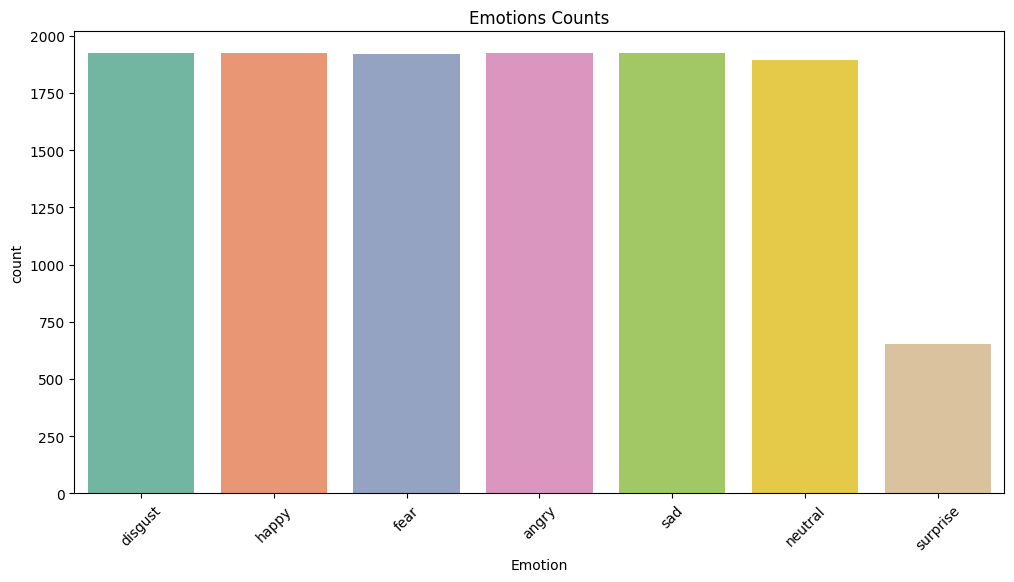

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
emotion_names=main_df['Emotion'].unique()

In [ ]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [ ]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [ ]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

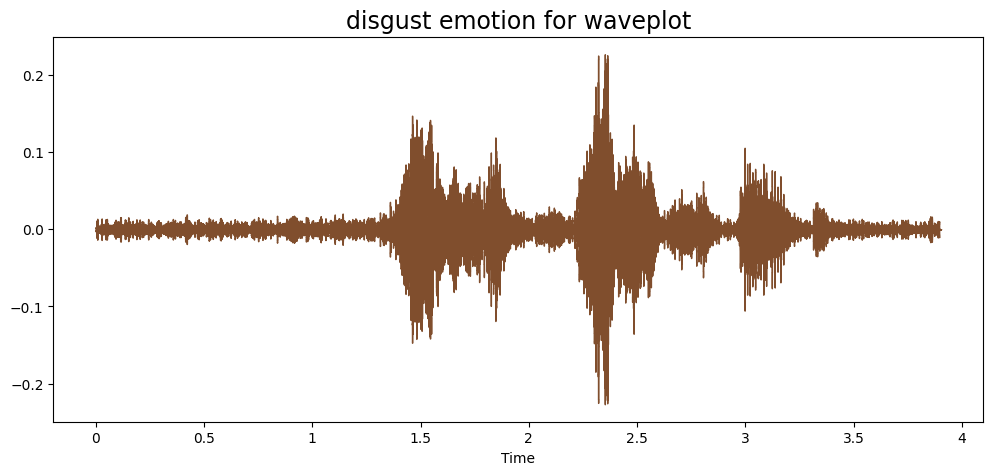

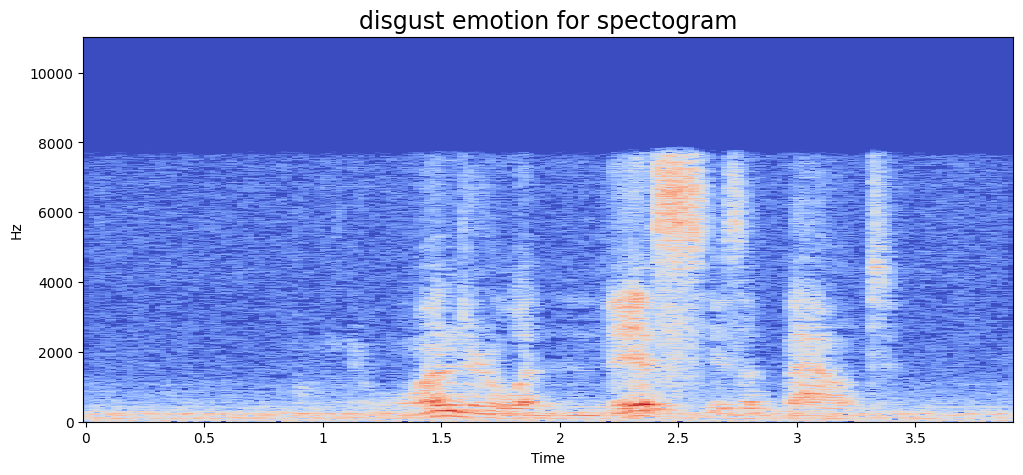

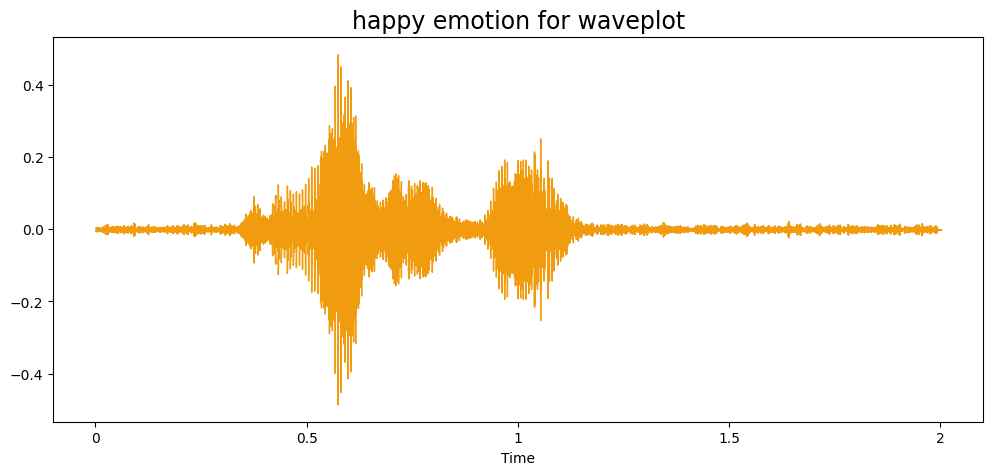

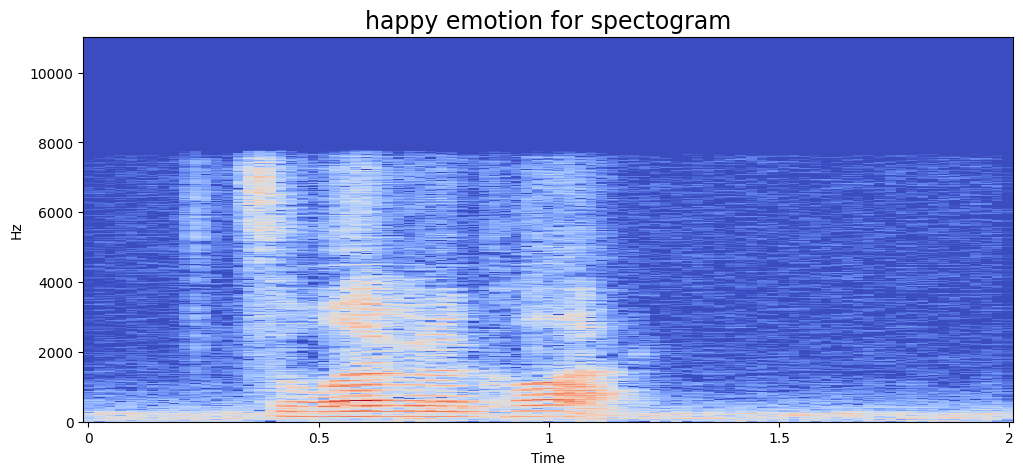

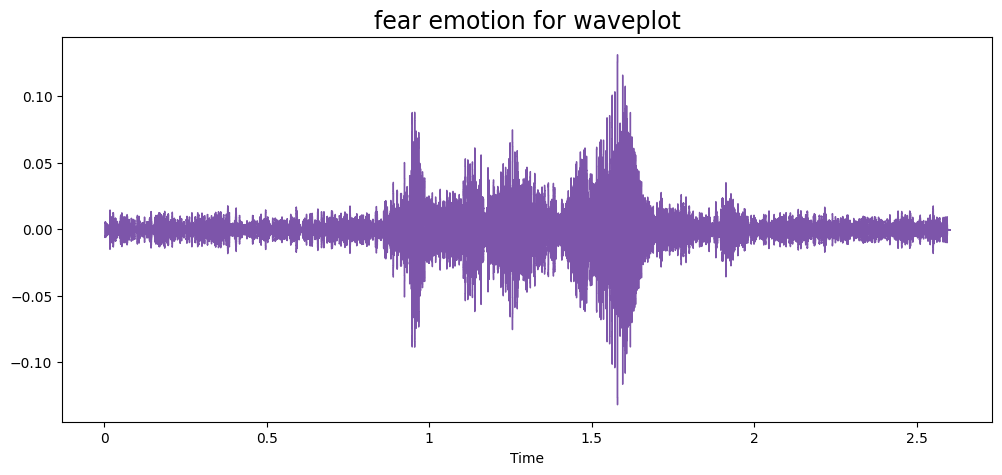

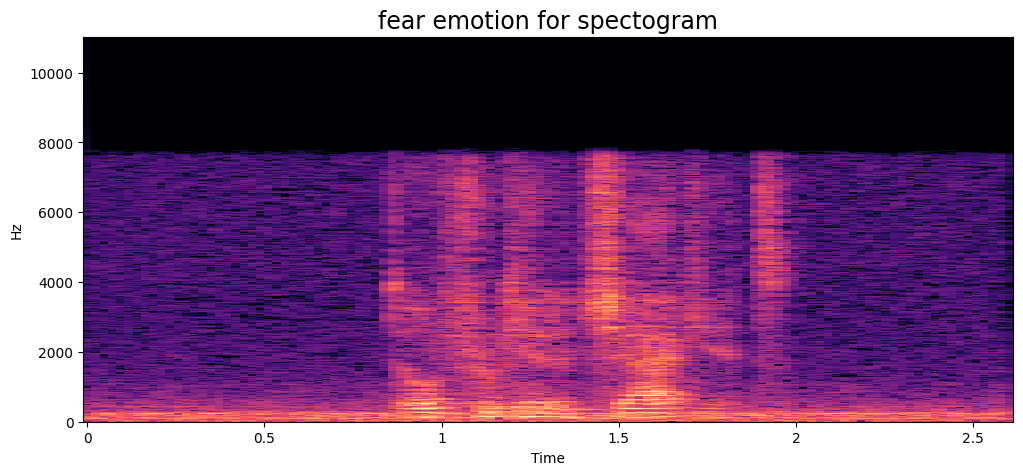

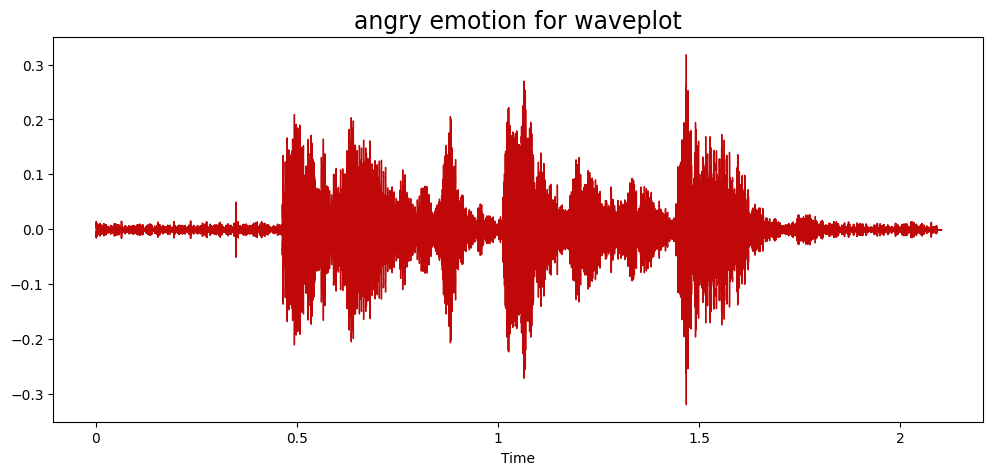

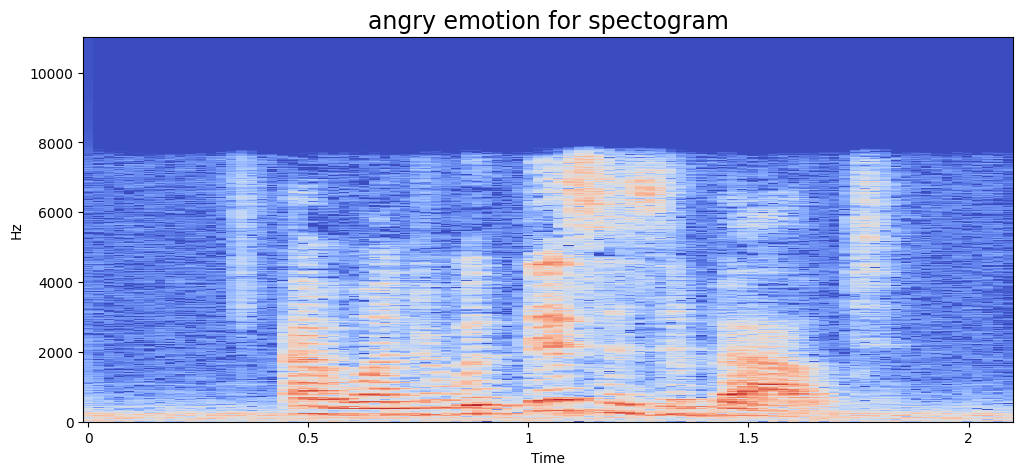

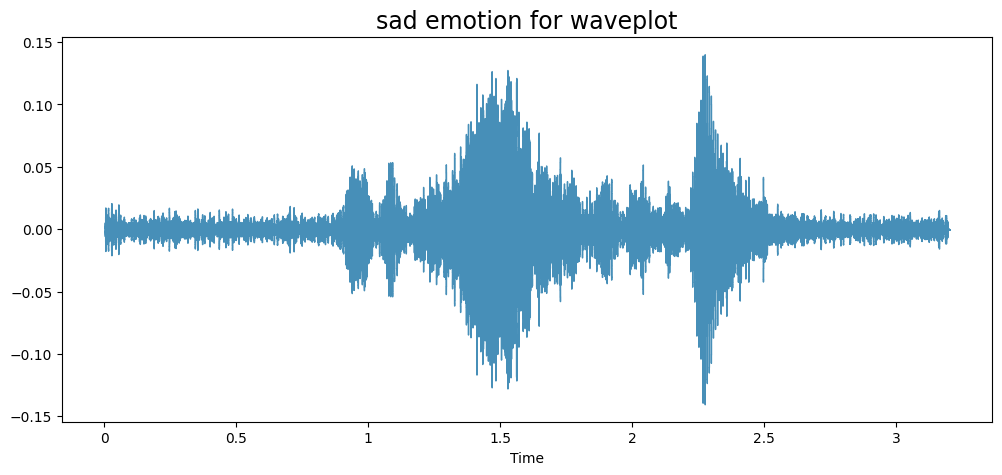

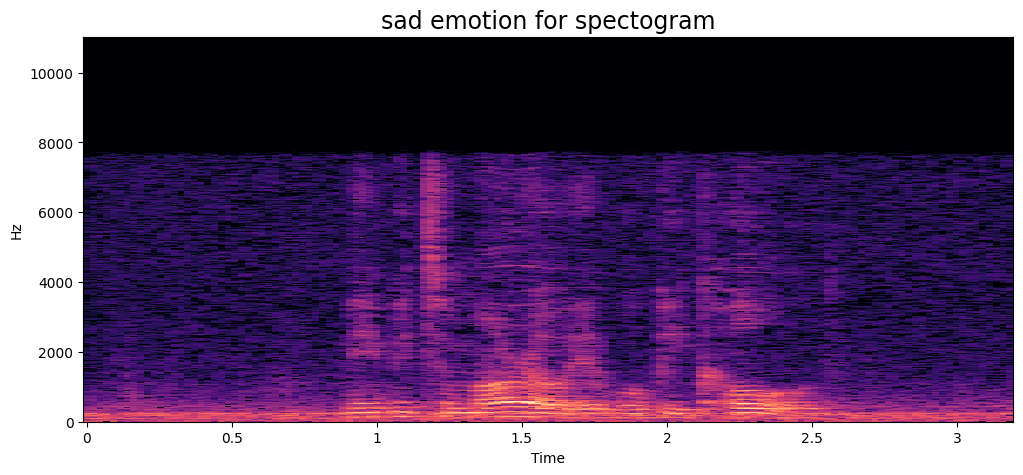

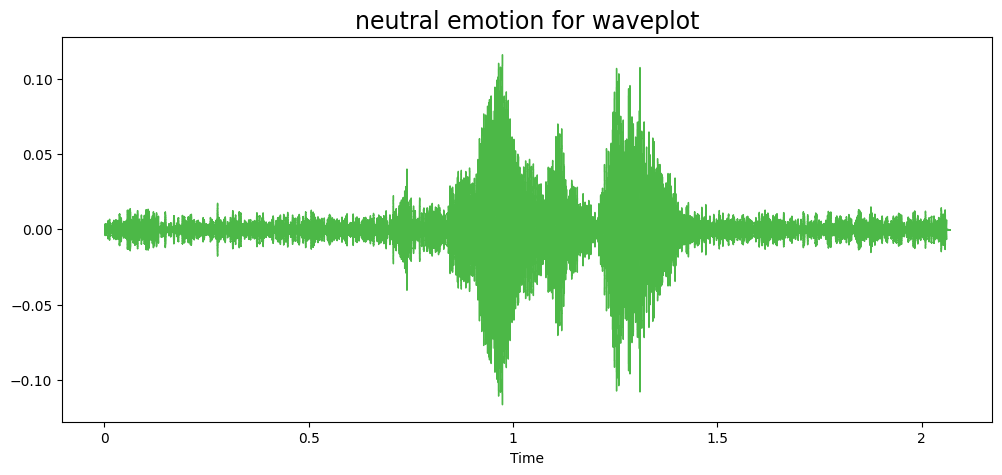

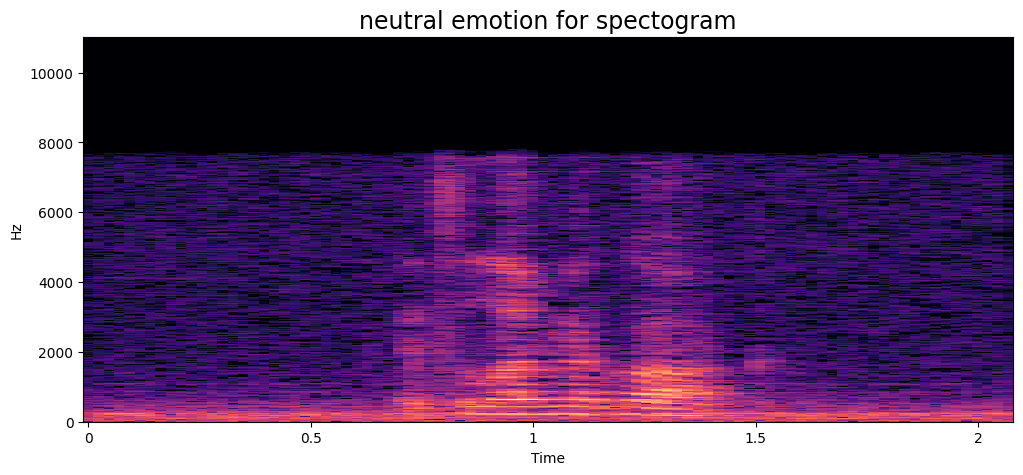

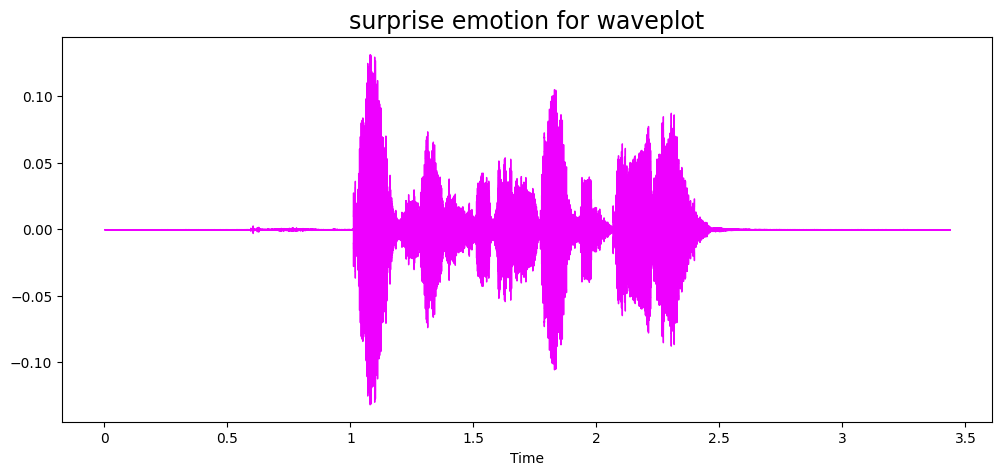

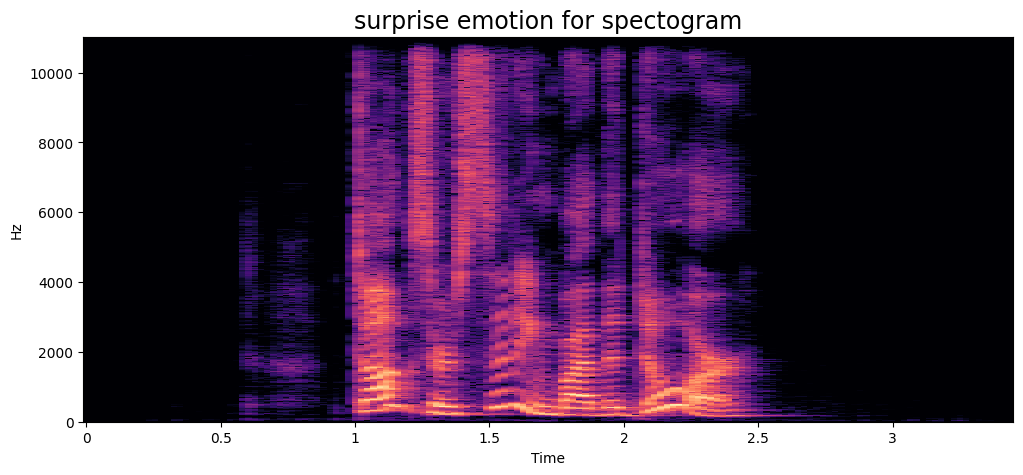

In [ ]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [ ]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [ ]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [ ]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [ ]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [ ]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [ ]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [ ]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample



<a id="7"></a>
## Audio Augmentation

In [ ]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data, sr, pitch_factor=0.7, random=False):
    if random:
        pitch_factor = np.random.random() * pitch_factor
    n_steps = np.log2(pitch_factor) * 12
    return librosa.effects.pitch_shift(data, n_steps=n_steps, sr=sr)

def streching(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)


In [ ]:
data,sr=librosa.load(audio_path[6])

<a id="4"></a>
### Orijinal Audio

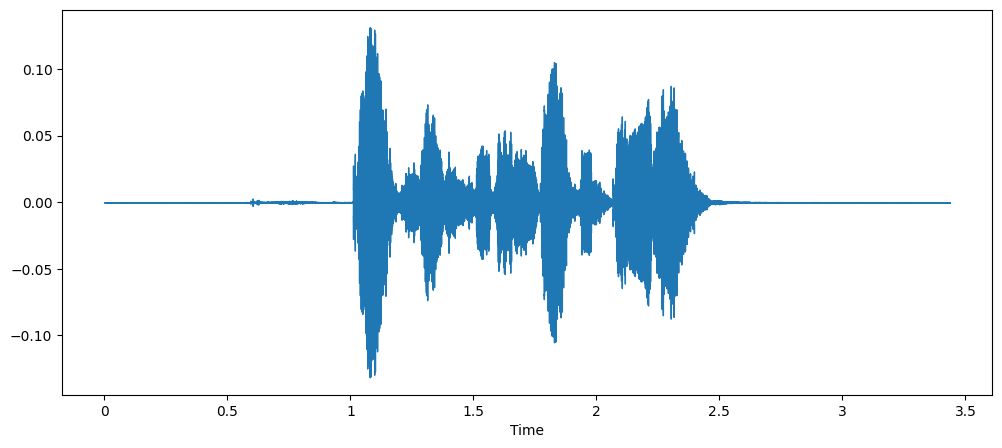

In [ ]:
plt.figure(figsize=(12,5))
librosa.display.waveshow(data)
IPython.display.Audio(audio_path[6])

<a id="8"></a>
### Noised Audio

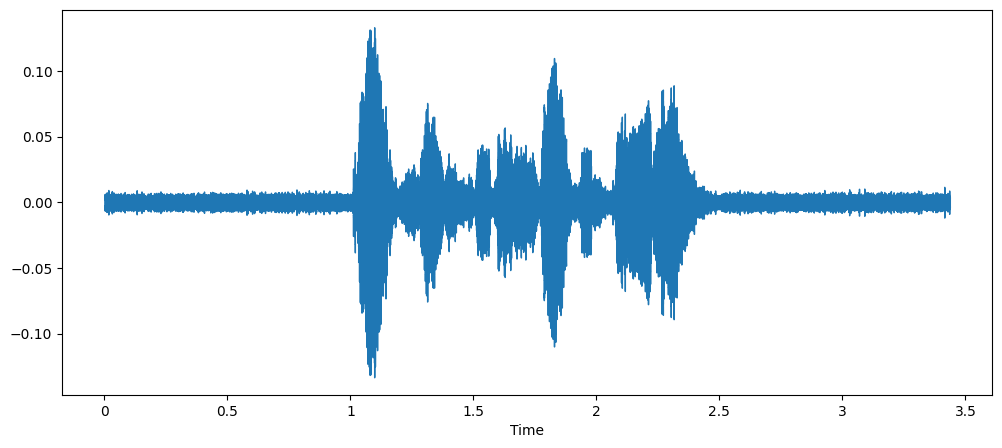

In [ ]:
noised_audio=add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(noised_audio)
IPython.display.Audio(noised_audio,rate=sr)

<a id="10"></a>
### Streched Audio

In [ ]:
print(data)

[-1.0507285e-08  2.4294772e-08 -3.4531361e-08 ... -8.2402059e-09
  5.9556560e-09 -3.9119143e-09]


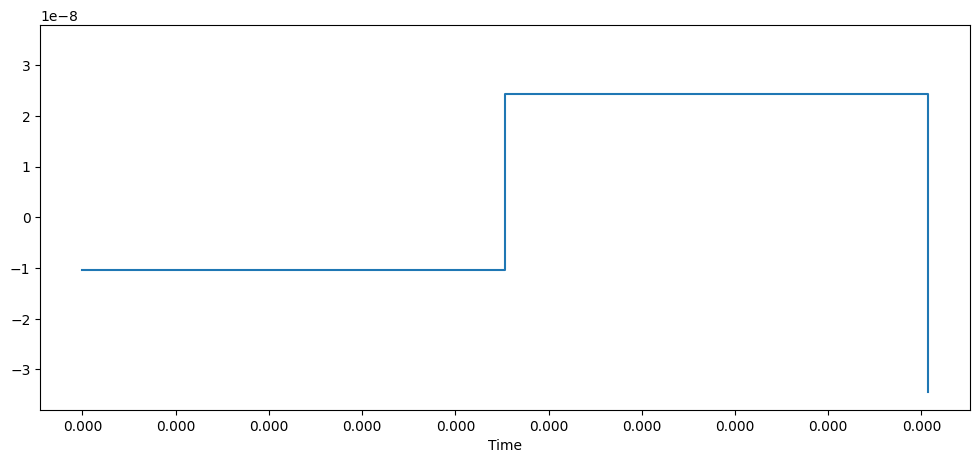

In [ ]:
stretched_audio=streching(data, sr)
plt.figure(figsize=(12,5))
librosa.display.waveshow(stretched_audio)
IPython.display.Audio(stretched_audio,rate=sr)

<a id="11"></a>
### Shifted Audio

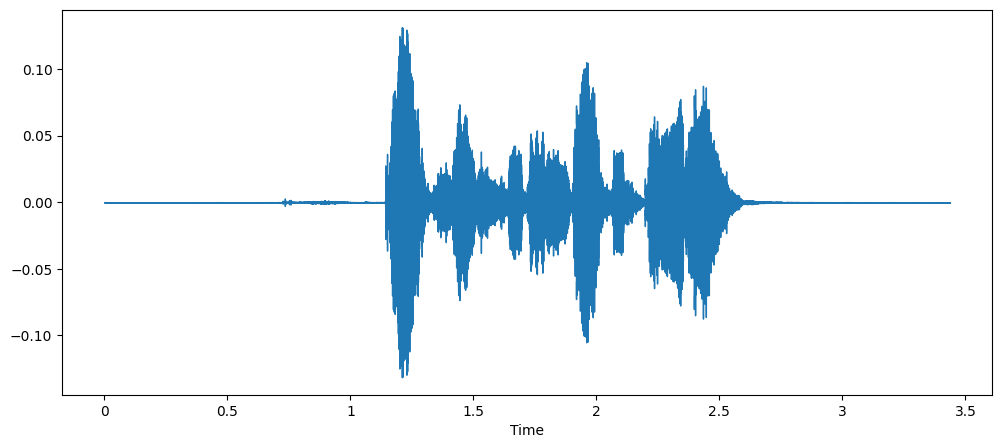

In [ ]:
shifted_audio=shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio)
IPython.display.Audio(shifted_audio,rate=sr)

<a id="12"></a>
### Pitched Audio

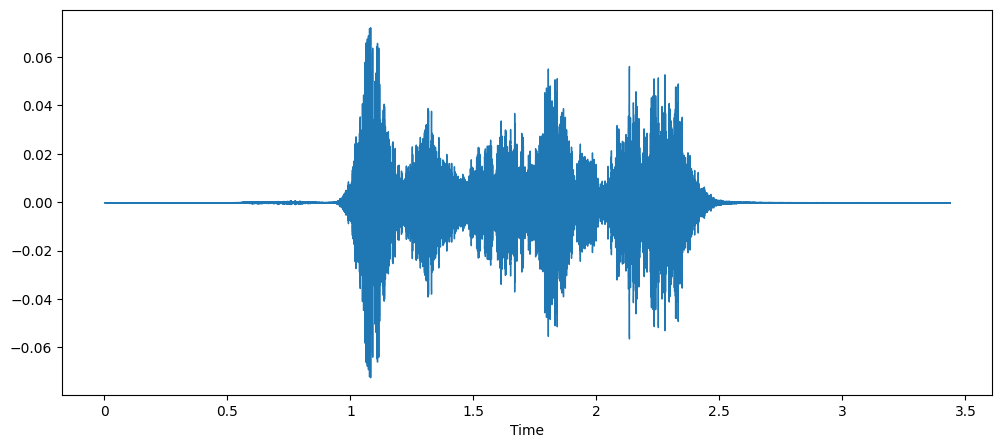

In [ ]:
pitched_audio = pitching(data, sr)

plt.figure(figsize=(12, 5))
librosa.display.waveshow(pitched_audio)
IPython.display.Audio(pitched_audio, rate=sr)


<a id="13"></a>
## Feature Extraction

In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    return np.squeeze(librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length))
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=2.5,offset=0.6)
    aud=extract_features(data,sr)
    audio=np.array(aud)

    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))

    return audio

<a id="14"></a>
## Processing

In [ ]:
X, Y = [], []
for path, emotion, index in zip(main_df.File_Path, main_df.Emotion, range(main_df.File_Path.shape[0])):
    features = get_features(path)
    if index % 500 == 0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed
Done


In [ ]:
processed_data_path='/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/processed_data.csv'

In [ ]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

ValueError: ignored

<a id="15"></a>
# Including Analyzed Audio Features

In [ ]:
processed_data_path='/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/processed_data.csv'

In [ ]:
df=pd.read_csv(processed_data_path)
df.shape

(48644, 2377)

In [ ]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(48644, 2377)

In [ ]:
df.head(10)

0         1         2         3         4         5         6  \
0  0.028809  0.038574  0.053223  0.063477  0.087891  0.107910  0.120117   
1  0.207031  0.301270  0.402344  0.351074  0.282227  0.224121  0.157227   
2  0.021973  0.038574  0.057129  0.073242  0.082520  0.085938  0.086426   
3  0.038086  0.042480  0.054199  0.039551  0.028320  0.027832  0.022461   
4  0.030762  0.043457  0.056152  0.051758  0.050781  0.051270  0.051270   
5  0.030762  0.043457  0.056152  0.051758  0.050781  0.051270  0.051270   
6  0.018555  0.025879  0.033203  0.028809  0.029297  0.028809  0.028809   
7  0.013184  0.025391  0.039062  0.036133  0.037109  0.031738  0.039062   
8  0.023926  0.039062  0.053711  0.063477  0.053223  0.050293  0.040527   
9  0.163086  0.253906  0.350098  0.366699  0.370605  0.376953  0.353516   

          7         8         9  ...      2367       2368      2369  \
0  0.101562  0.076172  0.057617  ...  0.000000   0.000000  0.000000   
1  0.123047  0.108398  0.089355  ...  0.000000   0.000000  0.000000   
2  0.073242  0.061523  0.050781  ...  0.000000   0.000000  0.000000   
3  0.025879  0.020996  0.021484  ...  0.000000   0.000000  0.000000   
4  0.053223  0.053223  0.059570  ...  0.000000   0.000000  0.000000   
5  0.053223  0.054199  0.065430  ...  0.000000   0.000000  0.000000   
6  0.028809  0.028809  0.029297  ...  0.000000   0.000000  0.000000   
7  0.038574  0.040039  0.045898  ...  0.000000   0.000000  0.000000   
8  0.028320  0.030273  0.026367  ... -9.391412  12.880905 -0.702413   
9  0.327148  0.332031  0.329102  ...  2.853539   0.795807  2.484653   

        2370       2371      2372      2373      2374      2375  Emotion  
0   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  disgust  
1   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  disgust  
2   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  disgust  
3   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  disgust  
4   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000    happy  
5   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000    happy  
6   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000    happy  
7   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000    happy  
8  13.905436 -15.935526 -2.029146 -5.330669  2.700060  3.653075     fear  
9   2.232082   0.704767 -2.300712 -4.718306  1.652256 -0.339002     fear  

[10 rows x 2377 columns]

<a id="16"></a>
# Processing Analyzed Data for Training

In [ ]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [ ]:
lb=LabelEncoder()
Y=np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<a id="17"></a>
## Train, Test and Validation Spliting

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38915, 2376), (9729, 2376), (38915, 7), (9729, 7))

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((35023, 2376), (9729, 2376), (3892, 2376), (35023, 7), (9729, 7), (3892, 7))

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((35023, 2376), (9729, 2376), (3892, 2376), (35023, 7), (9729, 7), (3892, 7))

In [ ]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((35023, 2376, 1), (9729, 2376, 1), (3892, 2376, 1))

<a id="18"></a>
## Tuning for Training

In [ ]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
EPOCH=18
BATCH_SIZE=64

<a id="19"></a>
# Begin Training

In [ ]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

In [ ]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/18
548/548 [==============================] - ETA: 0s - loss: 1.6379 - accuracy: 0.3684

548/548 [==============================] - 189s 309ms/step - loss: 1.6379 - accuracy: 0.3684 - val_loss: 1.7609 - val_accuracy: 0.3268 - lr: 0.0010
Epoch 2/18
548/548 [==============================] - ETA: 0s - loss: 1.4124 - accuracy: 0.4475

548/548 [==============================] - 167s 305ms/step - loss: 1.4124 - accuracy: 0.4475 - val_loss: 1.5021 - val_accuracy: 0.4214 - lr: 0.0010
Epoch 3/18
548/548 [==============================] - ETA: 0s - loss: 1.3147 - accuracy: 0.4856

548/548 [==============================] - 167s 305ms/step - loss: 1.3147 - accuracy: 0.4856 - val_loss: 1.3740 - val_accuracy: 0.4679 - lr: 0.0010
Epoch 4/18
548/548 [==============================] - ETA: 0s - loss: 1.2401 - accuracy: 0.5145

548/548 [==============================] - 167s 304ms/step - loss: 1.2401 - accuracy: 0.5145 - val_loss: 1.3060 - val_accuracy: 0.4879 - lr: 0.0010
Epoch 5/18
548/548 [==============================] - ETA: 0s - loss: 1.1718 - accuracy: 0.5450

548/548 [==============================] - 167s 305ms/step - loss: 1.1718 - accuracy: 0.5450 - val_loss: 1.2903 - val_accuracy: 0.4856 - lr: 0.0010
Epoch 6/18
548/548 [==============================] - ETA: 0s - loss: 1.1179 - accuracy: 0.5692

548/548 [==============================] - 167s 305ms/step - loss: 1.1179 - accuracy: 0.5692 - val_loss: 1.2750 - val_accuracy: 0.4992 - lr: 0.0010
Epoch 7/18
548/548 [==============================] - ETA: 0s - loss: 1.0756 - accuracy: 0.5846

548/548 [==============================] - 167s 304ms/step - loss: 1.0756 - accuracy: 0.5846 - val_loss: 1.2532 - val_accuracy: 0.5105 - lr: 0.0010
Epoch 8/18
548/548 [==============================] - ETA: 0s - loss: 0.9868 - accuracy: 0.6191

548/548 [==============================] - 166s 304ms/step - loss: 0.9868 - accuracy: 0.6191 - val_loss: 1.2677 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 9/18
548/548 [==============================] - ETA: 0s - loss: 0.9089 - accuracy: 0.6542

548/548 [==============================] - 167s 304ms/step - loss: 0.9089 - accuracy: 0.6542 - val_loss: 1.1652 - val_accuracy: 0.5678 - lr: 0.0010
Epoch 10/18
548/548 [==============================] - ETA: 0s - loss: 0.8161 - accuracy: 0.6902

548/548 [==============================] - 167s 305ms/step - loss: 0.8161 - accuracy: 0.6902 - val_loss: 1.1436 - val_accuracy: 0.5689 - lr: 0.0010
Epoch 11/18
548/548 [==============================] - ETA: 0s - loss: 0.7215 - accuracy: 0.7282

548/548 [==============================] - 167s 304ms/step - loss: 0.7215 - accuracy: 0.7282 - val_loss: 1.1777 - val_accuracy: 0.5737 - lr: 0.0010
Epoch 12/18
548/548 [==============================] - ETA: 0s - loss: 0.6331 - accuracy: 0.7640

548/548 [==============================] - 166s 304ms/step - loss: 0.6331 - accuracy: 0.7640 - val_loss: 1.2282 - val_accuracy: 0.5622 - lr: 0.0010
Epoch 13/18
548/548 [==============================] - ETA: 0s - loss: 0.5382 - accuracy: 0.8029

548/548 [==============================] - 167s 304ms/step - loss: 0.5382 - accuracy: 0.8029 - val_loss: 1.1920 - val_accuracy: 0.5989 - lr: 0.0010
Epoch 14/18
548/548 [==============================] - ETA: 0s - loss: 0.4542 - accuracy: 0.8351

548/548 [==============================] - 167s 304ms/step - loss: 0.4542 - accuracy: 0.8351 - val_loss: 1.3097 - val_accuracy: 0.5894 - lr: 0.0010
Epoch 15/18
548/548 [==============================] - ETA: 0s - loss: 0.4084 - accuracy: 0.8534

548/548 [==============================] - 167s 304ms/step - loss: 0.4084 - accuracy: 0.8534 - val_loss: 1.3373 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 16/18
548/548 [==============================] - ETA: 0s - loss: 0.3328 - accuracy: 0.8813

548/548 [==============================] - 167s 304ms/step - loss: 0.3328 - accuracy: 0.8813 - val_loss: 1.3028 - val_accuracy: 0.6210 - lr: 0.0010
Epoch 17/18
548/548 [==============================] - ETA: 0s - loss: 0.3122 - accuracy: 0.8872

548/548 [==============================] - 167s 304ms/step - loss: 0.3122 - accuracy: 0.8872 - val_loss: 1.3293 - val_accuracy: 0.6184 - lr: 0.0010
Epoch 18/18
548/548 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.9049

548/548 [==============================] - 166s 304ms/step - loss: 0.2693 - accuracy: 0.9049 - val_loss: 1.4873 - val_accuracy: 0.6028 - lr: 0.0010


<a id="20"></a>
# Drawing Charts

<a id="21"></a>
## Accuracy Charts

In [ ]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()

<a id="22"></a>
## Loss Charts

In [ ]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

<a id="24"></a>
# Testing Model and Test Results

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

305/305 [==============================] - 15s 46ms/step


array([3, 4, 2, ..., 3, 3, 5])

In [ ]:
y_check=np.argmax(y_test,axis=1)
y_check

array([3, 4, 2, ..., 1, 6, 5])

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 1.411179542541504
Test Accuracy: 0.618049144744873


<a id="25"></a>
## Confusion Matrix

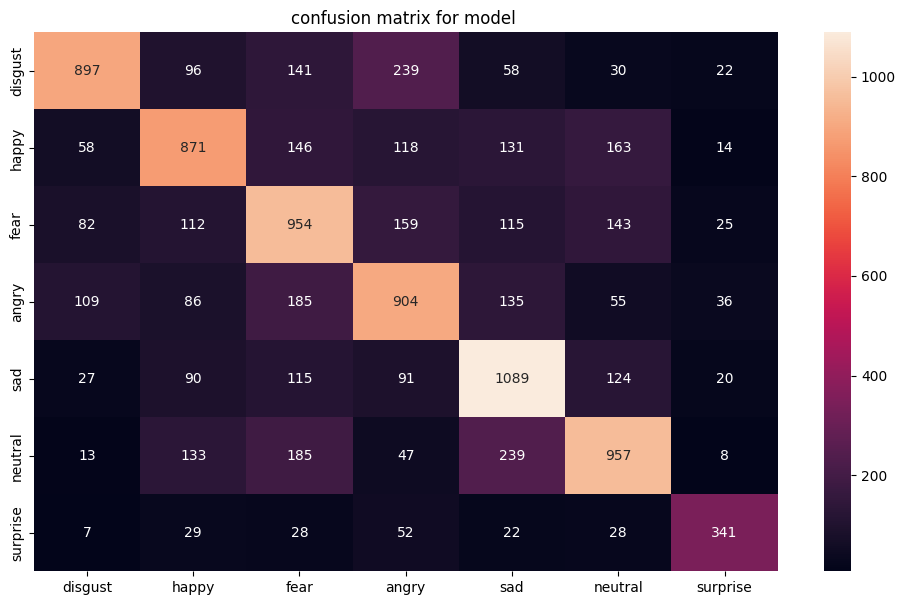

In [ ]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [ ]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

     disgust       0.75      0.60      0.67      1483
       happy       0.61      0.58      0.60      1501
        fear       0.54      0.60      0.57      1590
       angry       0.56      0.60      0.58      1510
         sad       0.61      0.70      0.65      1556
     neutral       0.64      0.60      0.62      1582
    surprise       0.73      0.67      0.70       507

    accuracy                           0.62      9729
   macro avg       0.64      0.62      0.63      9729
weighted avg       0.62      0.62      0.62      9729



In [ ]:
model_path = '/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/res_model.h5'

model.save(model_path)

In [ ]:
import pickle

file = open('/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/dataset.pkl', 'wb')

pickle.dump(model, file)

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/res_model.h5')

In [ ]:
Y[22]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
original_label = lb.inverse_transform([np.argmax(Y[22])])
original_label


array(['neutral'], dtype=object)

In [ ]:
X_test[1]

array([[-0.49310627],
       [-0.52638475],
       [-0.55331903],
       ...,
       [ 0.00586248],
       [-0.02579511],
       [ 0.00131087]])

In [ ]:
type(X_test)

numpy.ndarray

### **From here the part for front end starts. Some modification are needed**

In [ ]:
import pandas as pd
data, sr = librosa.load("/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/Crema/1080_MTI_SAD_XX.wav", duration=2.5, offset=0.6)
features = extract_features(data, sr)
X, Y = [], []
for i in features:
  X.append(i)
cols=2376-len(X)
X.extend([None] * cols)
extract=pd.DataFrame(X)
extract = extract.values.reshape(1, -1)
extract=pd.DataFrame(extract)
extract=extract.fillna(0)
print(extract.isna().any())
ext=extract.values

0       False
1       False
2       False
3       False
4       False
        ...  
2371    False
2372    False
2373    False
2374    False
2375    False
Length: 2376, dtype: bool


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
scaler=StandardScaler()
Input=scaler.fit_transform(ext)

In [ ]:
y_pr2 = model.predict(ext)
y_pr2 = np.argmax(y_pr2, axis=1)
original_label = lb.inverse_transform(y_pr2)
original_label

1/1 [==============================] - 0s 30ms/step


array(['happy'], dtype=object)

In [ ]:
import librosa
import numpy as np

def preprocess_audio(file_path):
    data, sr = librosa.load(file_path, duration=2.5, offset=0.6)
    features = extract_features(data, sr)
    X, Y = [], []
    for i in features:
      X.append(i)
    extract=pd.DataFrame(X)
    processed_data_path='/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/processed_data1.csv'
    extract.to_csv(processed_data_path,index=False)
    extract.head(10)
    # features = np.expand_dims(features, axis=0)  # Add batch dimension
    # features=features.fillna(0)
    # # print(features.isna().any())
    # features.shape
    # features = scaler.transform(features)  # Scale the features using the same scaler used during training
    # features = np.expand_dims(Tfeatures, axis=2)  # Add channel dimension (if necessary)
    # return features


    def predict_emotion(file_path):
    preprocess_audio(file_path)
    # features = preprocess_audio(file_path)
    # predictions = model.predict(features)
    # predicted_class = np.argmax(predictions[0])  # Get the index of the class with highest probability
    # emotion = lb.classes_[predicted_class]  # Convert the index to emotion label using the label encoder
    # return emotion
    return "Happy"

In [ ]:


import tensorflow as tf

model2 = tf.keras.models.load_model('/content/drive/MyDrive/PW6-AUD-VID/Audio Classification/Datasets/res_model.h5')
output=model2.predict(inp)



1/1 [==============================] - 0s 337ms/step
